## import libs


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Download the data set `adult-modified.csv` and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

In [2]:
adlt_df = pd.read_csv('../data/adult-modified.csv')

In [3]:
adlt_df.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [4]:
adlt_df.dtypes

age                int64
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [5]:
adlt_df.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [6]:
# get frequency of categorical features from df
[(adlt_df[cat_col].value_counts()) for cat_col in adlt_df.select_dtypes('object').columns]

[workclass
 Private     6947
 Public      1317
 Self-emp    1148
 Name: count, dtype: int64,
 marital-status
 Married    4737
 Single     4675
 Name: count, dtype: int64,
 race
 White          8062
 Black           892
 Asian           291
 Amer-Indian      92
 Hispanic         75
 Name: count, dtype: int64,
 sex
 Male      6383
 Female    3029
 Name: count, dtype: int64,
 income
 <=50K    7093
 >50K     2319
 Name: count, dtype: int64]

# Question 2

For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

In [7]:
# filter numeric dataframe
num_df = adlt_df.select_dtypes('int')

In [8]:
num_df

,age,education,hours-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40
...,...,...,...
9407,38,10,60
9408,25,9,8
9409,21,10,40
9410,38,2,53


## Boxplots

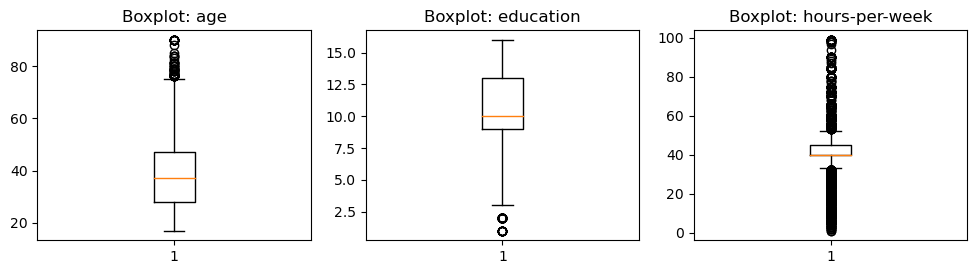

In [19]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax1.boxplot(num_df.age, )
ax1.set_title('Boxplot: age')
# ax1.set_ylabel('Age')
ax2.boxplot(num_df.education)
ax2.set_title('Boxplot: education')
# ax2.set_ylabel('education')
ax3.boxplot(num_df['hours-per-week'])
ax3.set_title('Boxplot: hours-per-week')
# ax3.set_ylabel('hours-per-week')
plt.show()

## Histogram

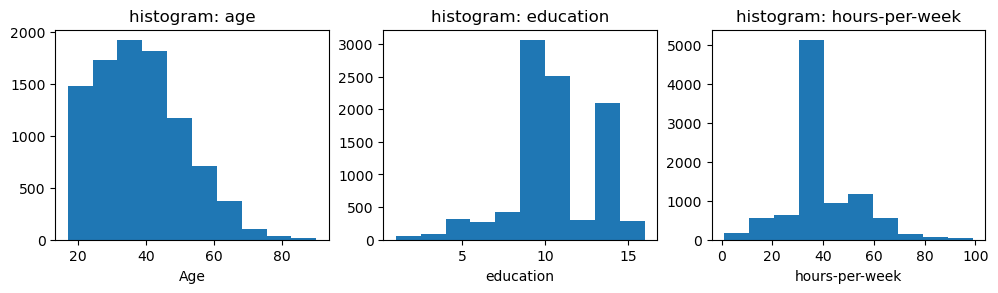

In [17]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax1.hist(num_df.age, )
ax1.set_title('histogram: age')
ax1.set_xlabel('Age')
ax2.hist(num_df.education)
ax2.set_title('histogram: education')
ax2.set_xlabel('education')
ax3.hist(num_df['hours-per-week'])
ax3.set_title('histogram: hours-per-week')
ax3.set_xlabel('hours-per-week')
plt.show()

## Scatter plot

Text(0.5, 1.0, 'Scatter plot Age vs Hours-per-week')

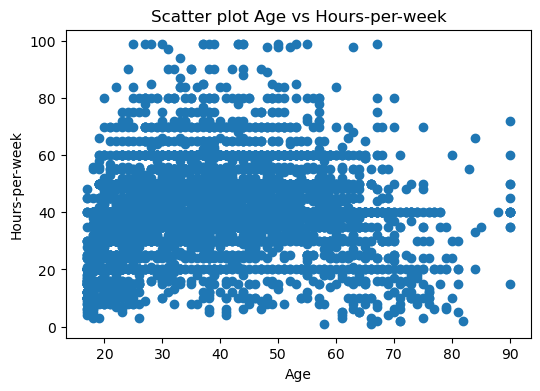

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(x=num_df['age'], y=num_df['hours-per-week'])
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Scatter plot Age vs Hours-per-week')

# Question 3

For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g., married vs. single; private vs. public vs. self-emp; etc). Ideally, you should use bar charts in a single figure similar to this figure.

In [66]:
# filter categorical data
cat_df = adlt_df.select_dtypes('object')

In [67]:
cat_df.head()

,workclass,marital-status,race,sex,income
0,Public,Single,White,Male,<=50K
1,Self-emp,Married,White,Male,<=50K
2,Private,Single,White,Male,<=50K
3,Private,Married,Black,Male,<=50K
4,Private,Married,Black,Female,<=50K


In [68]:
# create counts dataframe

cnt_df = pd.DataFrame()
for col in cat_df.columns:
    tmp_df = pd.DataFrame(cat_df[col].value_counts()).reset_index().rename({f'{col}':'value'}, axis=1)
    tmp_df['col_name'] = col
    cnt_df = pd.concat([cnt_df, tmp_df], axis=0)

In [69]:
cnt_df.reset_index(drop=True, inplace=True)

In [70]:
cnt_df['id'] = cnt_df.index+1

In [71]:
cnt_df

,value,count,col_name,id
0,Private,6947,workclass,1
1,Public,1317,workclass,2
2,Self-emp,1148,workclass,3
3,Married,4737,marital-status,4
4,Single,4675,marital-status,5
5,White,8062,race,6
6,Black,892,race,7
7,Asian,291,race,8
8,Amer-Indian,92,race,9
9,Hispanic,75,race,10


In [90]:
cnt_df

,value,count,col_name,id
0,Private,6947,workclass,1
1,Public,1317,workclass,2
2,Self-emp,1148,workclass,3
3,Married,4737,marital-status,4
4,Single,4675,marital-status,5
5,White,8062,race,6
6,Black,892,race,7
7,Asian,291,race,8
8,Amer-Indian,92,race,9
9,Hispanic,75,race,10


<BarContainer object of 2 artists>

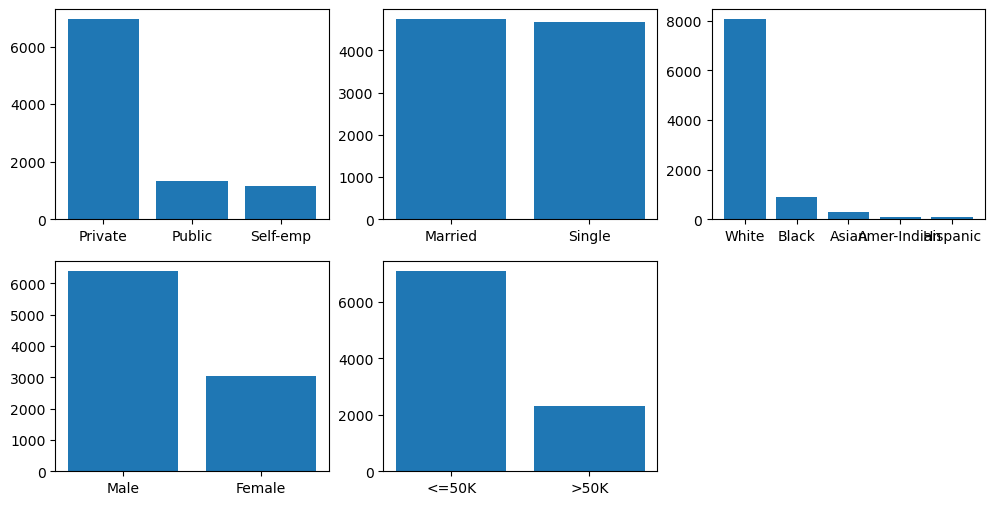

In [121]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)

ax1.bar(cnt_df[cnt_df.col_name=='workclass']['value'], cnt_df[cnt_df.col_name=='workclass']['count'])
ax2.bar(cnt_df[cnt_df.col_name=='marital-status']['value'], cnt_df[cnt_df.col_name=='marital-status']['count'])
ax3.bar(cnt_df[cnt_df.col_name=='race']['value'], cnt_df[cnt_df.col_name=='race']['count'])
ax4.bar(cnt_df[cnt_df.col_name=='sex']['value'], cnt_df[cnt_df.col_name=='sex']['count'])
ax5.bar(cnt_df[cnt_df.col_name=='income']['value'], cnt_df[cnt_df.col_name=='income']['count'])


# Question 4

Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as groupby() and  cross-tab(), then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. As an illustration, consider this graph depicting the cross-tabulation of sex with income. In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group.

<Figure size 800x400 with 0 Axes>

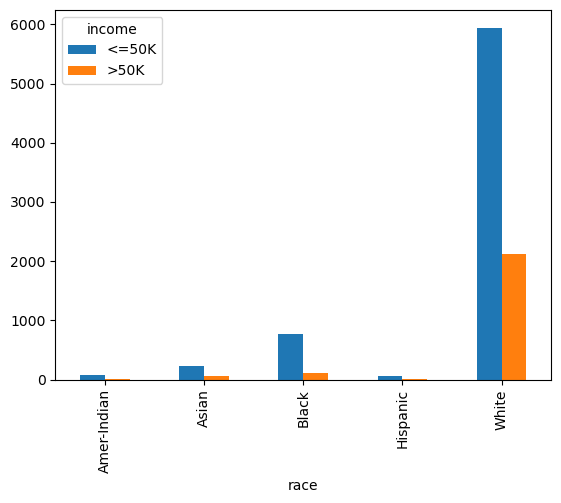

In [120]:
plt.figure(figsize=(8, 4))
pd.crosstab(cat_df.race, cat_df.income).plot(kind='bar')
plt.show()